In [1]:
import os
import glob
import pandas as pd
import numpy as np

from functions import extract_features_essentia

In [2]:
audio_path = os.path.join('..','data','wav_files')

In [3]:
# Use glob to find all files starting with 'sub-'
file_pattern = os.path.join(audio_path, f'sub-*.wav')
files = glob.glob(file_pattern)
files.sort()

In [4]:
files

['../data/wav_files/sub-01_Joyfulactivation_2PpruBYCo4H7WOBJ7Q2EwM.wav',
 '../data/wav_files/sub-01_Joyfulactivation_5kRBzRZmZTXVg8okC7SJFZ.wav',
 '../data/wav_files/sub-01_Nostalgia_2iXdwVdzA0KrI2Q0iZNJbX.wav',
 '../data/wav_files/sub-01_Nostalgia_7zkLpY72g6lKQbiHDqri1S.wav',
 '../data/wav_files/sub-01_Peacefulness_298GtxeVHZbbotHS1e3vxO.wav',
 '../data/wav_files/sub-01_Peacefulness_5ARrtxJLVCeTv5TWo1oKgC.wav',
 '../data/wav_files/sub-01_Power_3jS7bB0oXVOwGFZn3aE5NV.wav',
 '../data/wav_files/sub-01_Power_3lQO10djAi0Ym506za76Wt.wav',
 '../data/wav_files/sub-01_Sadness_1AHPsqF3EtHeWpOM06Y3Y4.wav',
 '../data/wav_files/sub-01_Sadness_54KFQB6N4pn926IUUYZGzK.wav',
 '../data/wav_files/sub-01_Tenderness_3tkLVA291cVPJLHlSSOjHN.wav',
 '../data/wav_files/sub-01_Tenderness_5PbSvsljhgxijSYV5cG5xU.wav',
 '../data/wav_files/sub-01_Tension_1AHPsqF3EtHeWpOM06Y3Y4.wav',
 '../data/wav_files/sub-01_Tension_4GBZUZe04pHVN0TLhejCSS.wav',
 '../data/wav_files/sub-01_Transcendence_0Gr2XQOIMaaUH86iOrWGur.wav',


In [5]:
# run for first in list
audio_name = os.path.basename(files[0])
M, feat_names, emotion_name = extract_features_essentia(audio_name, audio_path)

[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done


In [6]:
# Initialize DataFrame
df = pd.DataFrame(columns=feat_names + ['emotion'], index=range(len(files)))

In [7]:
# Iterate on the rest
for ii in range(len(files)):
    
    audio_name = os.path.basename(files[ii])
    M, feat_names, emotion_name = extract_features_essentia(audio_name, audio_path)

    df.iloc[ii,:-1] = M
    df.at[ii,'emotion'] = emotion_name

[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, and EBU 128 loudness
[   INFO   ] MusicExtractor: Replay gain
[   INFO   ] MusicExtractor: Compute audio features
[   INFO   ] MusicExtractor: Compute aggregation
[   INFO   ] All done
[   INFO   ] MusicExtractor: Read metadata
[   INFO   ] MusicExtractor: Compute md5 audio hash, codec, length, a

In [8]:
df

,lowlevel.average_loudness,lowlevel.barkbands_crest.mean,lowlevel.barkbands_crest.stdev,lowlevel.barkbands_flatness_db.mean,lowlevel.barkbands_flatness_db.stdev,lowlevel.barkbands_kurtosis.mean,lowlevel.barkbands_kurtosis.stdev,lowlevel.barkbands_skewness.mean,lowlevel.barkbands_skewness.stdev,lowlevel.barkbands_spread.mean,...,tonal.hpcp_entropy.mean,tonal.hpcp_entropy.stdev,tonal.key_edma.strength,tonal.key_krumhansl.strength,tonal.key_temperley.strength,tonal.tuning_diatonic_strength,tonal.tuning_equal_tempered_deviation,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,emotion
0,0.984629,9.366194,3.271858,0.146572,0.045194,4.056176,7.778135,1.504132,1.268401,18.078497,...,2.225347,0.68899,0.753155,0.752207,0.752781,0.644717,0.138863,440.0,0.789783,Joyfulactivation
1,0.917135,9.21587,3.664309,0.10167,0.028441,2.215264,4.161178,1.347306,0.853917,25.441069,...,1.95479,0.695975,0.733425,0.735518,0.727721,0.639732,0.034799,439.745911,0.712456,Joyfulactivation
2,0.979716,14.814351,4.959631,0.224629,0.087561,28.017239,38.13987,3.634691,2.21791,12.920436,...,1.472135,0.790936,0.595217,0.596496,0.597491,0.479838,0.074582,439.745911,0.688742,Nostalgia
3,0.888772,13.000507,4.211658,0.282733,0.074104,12.85933,17.978224,1.671389,1.610298,6.656551,...,1.777743,0.757268,0.796125,0.809681,0.823362,0.750096,0.094925,436.960693,0.808362,Nostalgia
4,0.966672,11.821041,4.28273,0.201916,0.070722,12.231054,16.268501,2.405453,1.70298,11.617296,...,1.83018,0.616522,0.71712,0.719946,0.707451,0.445444,0.211904,434.193115,0.977908,Peacefulness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.917264,8.131842,3.606577,0.122113,0.048351,0.474554,2.78909,0.572197,0.756547,22.938862,...,1.489834,0.70052,0.749606,0.759849,0.765387,0.625577,0.074776,443.572571,0.719737,Tension
333,0.901504,15.485978,4.663514,0.333427,0.033447,6.982356,7.561019,0.528971,0.903685,3.794273,...,0.960901,0.674675,0.736594,0.735379,0.74594,0.600642,0.003002,442.54892,0.606085,Transcendence
334,0.826105,14.621445,4.419866,0.315315,0.043592,7.700938,7.470002,1.558066,1.037878,3.277036,...,1.168586,0.53361,0.727251,0.737685,0.744166,0.556717,0.000641,440.508636,0.599946,Transcendence
335,0.925521,11.901822,4.066735,0.262936,0.039769,7.337236,5.402016,1.54497,0.769647,5.735786,...,1.486413,0.578778,0.715498,0.721676,0.714758,0.489655,0.020224,443.572571,0.593671,Wonder


In [9]:
# save df
df.to_csv(os.path.join('..','data','music_features.csv'), index=False)

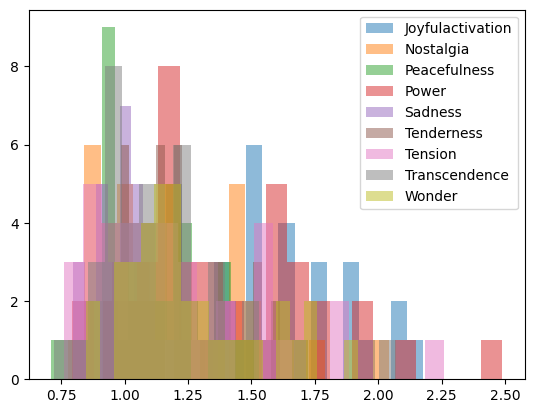

In [17]:
# ToDo Histograms of lowlevel.average_loudness for all emotions
import matplotlib.pyplot as plt

for emotion in df['emotion'].unique():
    plt.hist(df.loc[df['emotion']==emotion,'rhythm.danceability'], bins=20, alpha=0.5, label=emotion)

plt.legend()
plt.show()

In [19]:
# Perform ANOVA on all features - factor is emotion
from scipy.stats import f_oneway

for feat in feat_names:
    f, p = f_oneway(*[df.loc[df['emotion']==emotion,feat] for emotion in df['emotion'].unique()])

    # multiple comparison correction
    p = p * len(feat_names)

    # print if p < 0.05
    if p < 0.05:
        print(feat, p)

lowlevel.barkbands_crest.mean 5.174886127462491e-13
lowlevel.barkbands_flatness_db.mean 2.7536184583179144e-18
lowlevel.barkbands_flatness_db.stdev 0.0046096623702005755
lowlevel.barkbands_skewness.mean 0.0022425330159732367
lowlevel.barkbands_spread.mean 2.8723003902454185e-22
lowlevel.barkbands_spread.stdev 0.02144131329197865
lowlevel.dissonance.mean 7.246610520973361e-20
lowlevel.dissonance.stdev 1.3653160222097436e-20
lowlevel.dynamic_complexity 8.996176614211117e-05
lowlevel.erbbands_crest.mean 4.9989201934227184e-14
lowlevel.erbbands_crest.stdev 0.007494480631876588
lowlevel.erbbands_flatness_db.mean 6.838918228348064e-13
lowlevel.erbbands_flatness_db.stdev 0.0036645128199733184
lowlevel.erbbands_kurtosis.mean 2.7829532566634686e-08
lowlevel.erbbands_kurtosis.stdev 0.0018726033479376332
lowlevel.erbbands_skewness.mean 1.9993474365700108e-15
lowlevel.erbbands_skewness.stdev 3.097746946727793e-07
lowlevel.erbbands_spread.mean 1.7806552346510348e-11
lowlevel.erbbands_spread.stdev 0

/var/folders/nd/bgqkn02j7sl982jdtqhts9z00000gn/T/ipykernel_8442/1426164374.py:5: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  f, p = f_oneway(*[df.loc[df['emotion']==emotion,feat] for emotion in df['emotion'].unique()])


In [26]:
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# List to store Kruskal-Wallis test results
kruskal_results = {}
p_values = []

# Get unique emotions
emotions = df['emotion'].unique()

# Loop through each feature
for feature in df.columns[:-1]:  # Exclude the 'emotion' column
    groups = [df[df['emotion'] == emotion][feature] for emotion in emotions]
    
    # Check if all values in each group are identical
    if any(group.nunique() == 1 for group in groups):
        print(f'Skipping {feature} due to identical values in one or more groups')
        continue
    
    # Perform Kruskal-Wallis H-test
    h_stat, p_val = kruskal(*groups)
    kruskal_results[feature] = (h_stat, p_val)
    p_values.append(p_val)

# Apply multiple comparisons correction (Benjamini-Hochberg)
rejected, p_values_corrected, _, _ = multipletests(p_values, alpha=0.005, method='bonferroni')


Skipping lowlevel.silence_rate_20dB.mean due to identical values in one or more groups
Skipping lowlevel.silence_rate_20dB.stdev due to identical values in one or more groups
Skipping metadata.audio_properties.analysis.equal_loudness due to identical values in one or more groups
Skipping metadata.audio_properties.analysis.length due to identical values in one or more groups
Skipping metadata.audio_properties.analysis.sample_rate due to identical values in one or more groups
Skipping metadata.audio_properties.analysis.start_time due to identical values in one or more groups
Skipping metadata.audio_properties.bit_rate due to identical values in one or more groups
Skipping metadata.audio_properties.length due to identical values in one or more groups
Skipping metadata.audio_properties.lossless due to identical values in one or more groups
Skipping metadata.audio_properties.number_channels due to identical values in one or more groups
Skipping metadata.audio_properties.sample_rate due to i

In [27]:
np.sum(rejected)

55

In [28]:
np.sort(p_values_corrected)

array([7.36700505e-22, 9.65169986e-21, 3.18231328e-19, 4.87256739e-19,
       5.81499776e-19, 1.01303254e-18, 1.82201635e-18, 2.89906461e-18,
       4.00934593e-18, 7.03146419e-18, 2.41439580e-17, 6.12591313e-17,
       8.60093690e-16, 9.04069035e-16, 9.47091820e-16, 1.20382311e-15,
       2.49389818e-15, 6.03509452e-15, 7.90016004e-15, 1.04300371e-14,
       1.77801143e-14, 2.75830019e-14, 1.01826530e-13, 7.14768783e-13,
       1.14356325e-11, 1.30900031e-11, 4.89786715e-11, 7.37257790e-11,
       8.33912684e-11, 1.88090915e-10, 6.05577773e-10, 1.03094679e-09,
       1.75366566e-09, 1.38780564e-08, 3.88978856e-08, 1.85537671e-07,
       3.29803552e-07, 8.66132644e-07, 4.42672581e-06, 6.48832469e-06,
       1.90940544e-05, 2.85149664e-05, 3.47830117e-05, 8.47880821e-05,
       1.59520333e-04, 1.88785396e-04, 2.09442544e-04, 2.37206508e-04,
       4.28856947e-04, 6.76761248e-04, 7.85298847e-04, 1.65337807e-03,
       2.13047337e-03, 2.45260127e-03, 4.22062759e-03, 6.28836051e-03,
      

In [29]:
# Print corrected results
print("Significant results after multiple comparisons correction (Bonferroni, p < 0.005):")
for i, (feature, result) in enumerate(kruskal_results.items()):
    if rejected[i]:
        h_stat, p_val = result
        print(f'Feature: {feature}, H-stat={h_stat}, corrected p-value={p_values_corrected[i]}')

Significant results after multiple comparisons correction (Bonferroni, p < 0.05):
Feature: lowlevel.average_loudness, H-stat=55.84361434774087, corrected p-value=3.2980355219102353e-07
Feature: lowlevel.barkbands_crest.mean, H-stat=84.32597945781049, corrected p-value=7.147687825907786e-13
Feature: lowlevel.barkbands_flatness_db.mean, H-stat=114.52152871145768, corrected p-value=4.872567386134454e-19
Feature: lowlevel.barkbands_flatness_db.stdev, H-stat=49.14917482432111, corrected p-value=6.4883246885129e-06
Feature: lowlevel.barkbands_kurtosis.mean, H-stat=75.20222810308587, corrected p-value=4.897867150878958e-11
Feature: lowlevel.barkbands_kurtosis.stdev, H-stat=50.01416907889825, corrected p-value=4.4267258095098285e-06
Feature: lowlevel.barkbands_skewness.mean, H-stat=45.32646098835016, corrected p-value=3.4783011747824226e-05
Feature: lowlevel.barkbands_skewness.stdev, H-stat=40.90009814602854, corrected p-value=0.00023720650839775107
Feature: lowlevel.barkbands_spread.mean, H-s